In [11]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt

tf.__version__

'1.13.1'

(200, 1) (200, 1)


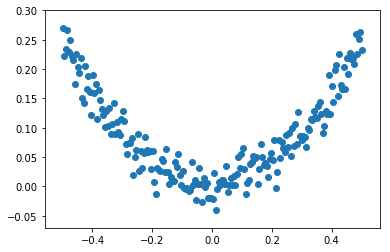

In [12]:
x_data = np.linspace(-0.5, 0.5, 200)[:, np.newaxis]
noise = np.random.normal(0, 0.02, x_data.shape)
y_data = np.square(x_data) + noise

print(x_data.shape, y_data.shape)

plt.scatter(x_data, y_data)
plt.show()

In [14]:
x = tf.placeholder(tf.float32, [None, 1])
y = tf.placeholder(tf.float32, [None, 1])

# 中间层
l1_w1 = tf.Variable(tf.random.normal([1, 10]))
l1_b1 = tf.Variable(tf.zeros([1, 10]))
l1 = tf.nn.tanh(tf.matmul(x, l1_w1) + l1_b1)

# 神经网络输出层
l2_w2 = tf.Variable(tf.random.normal([10, 1]))
l2_b2 = tf.Variable(tf.zeros([1, 1]))
pred = tf.nn.tanh(tf.matmul(l1, l2_w2) + l2_b2)

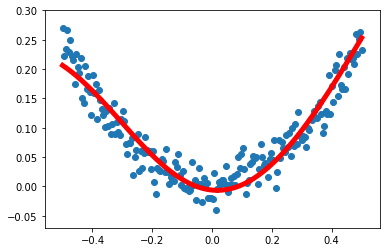

In [15]:
loss = tf.reduce_mean(tf.square(y - pred))
optimizer = tf.train.GradientDescentOptimizer(0.1).minimize(loss)


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for _ in range(2000):
        sess.run(optimizer, feed_dict={x:x_data, y:y_data})
    
    # 获取预测值
    pred_value = sess.run(pred, feed_dict={x: x_data})
    
    plt.figure()
    plt.scatter(x_data, y_data)
    plt.plot(x_data, pred_value, 'r-', lw=5)
    plt.show()